Project 2 - Clustering

CS (STAT) 5525

# Instructions and Experiments

Note: Please read the entire project description before you begin. The goal of this project is to analyze the performance of clustering algorithms on several synthetic and real-world data sets. This will be done in the following steps:

* First, you will explore the data sets.
* Next, you will perform a series of experiments on which you will be asked to answer a series of questions. For these experiments, you will be running a python Jupyter notebook.
* Third, you will compile your answers in the form of a report.

# Python Jupyter Notebooks

We recommend installing Jupyter using Anaconda as it will also install other regularly used packages for scientific computing and data science. Some pointers to setup Jupyter notebooks on your system:

* Video link - https://www.youtube.com/watch?v=MvN7Wdh0Juk
* Medium Link - https://medium.com/@neuralnets/beginners-quick-guide-for-handlingissues-launching-jupyter-notebook-for-python-using-anaconda-8be3d57a209b
* Tutorials link - https://www.dataquest.io/blog/jupyter-notebook-tutorial/, https://www.youtube.com/watch?v=3C9E2yPBw7s


## Before you Begin
* Visually explore the data sets in the experiments below, and consider the following:
  * types of attributes
  * class distribution
  * which attributes appear to be good predictors, if any
  * possible correlation between attributes
  * any special structure that you might observe

  Note: The discussion of this exploration is not required in the report, but this step will help you get ready to answer the questions that follow

## Report and Submission
* Write a report addressing the experiment questions. Your project will be evaluated based only on what you write on the report. Submit the report as a PDF file on Canvas.
* Collect output from all your experiments and submit your Jupyter notebooks (cells displaying output) electronically as a separate zipped file on Canvas. We will look at your outputs if something is ambiguous in your report. Copy and paste the output from the Jupyter notebook into your report only to the limited extent needed to support your answers.

### Problem 1

The files for this problem are under Experiment 1 folder. Datasets to be used for experimentation: `2d data`, `chameleon`, `elliptical`, and `vertebrate`. Jupyter notebook: `cluster analysis.ipynb`. In this experiment, you will use different clustering techniques provided by the scikit-learn library package to answer the following questions:

1. On the movie ratings dataset, k-means clustering assign users to two clusters: cluster 0 has users with more affiinity for horror movies, and cluster 1 has users with more affinity for action movies. Given the cluster centroids, assign the following users to their respective cluster assignment:


| User   | Exorcist | Omen  | Star Wars  | Jaws  |
| ------ | -------- | ----- | ---------- | ----- |
| Paul   | 4        | 5     | 2          | 4     |
| Adel   | 1        | 2     | 3          | 4     |
| Kevin  | 2        | 3     | 5          | 5     |
| Jessi  | 1        | 1     | 3          | 2     |

In [250]:
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# the matrix from above and cluster analysis.ipynb
ratings = [["Paul", 4,5,2,4], 
              ["Adel", 1,2,3,4], 
              ["Kevin", 2,3,5,5], 
              ["Jessi", 1,1,3,2],
              ["john", 5, 5, 2, 1],
            ["mary", 4, 5, 3, 2],
            ["bob", 4, 4, 4, 3],
            ["lisa", 2, 2, 4, 5],
            ["lee", 1, 2, 3, 4],
            ["harry", 2, 1, 5, 5]
          ]
ratings

[['Paul', 4, 5, 2, 4],
 ['Adel', 1, 2, 3, 4],
 ['Kevin', 2, 3, 5, 5],
 ['Jessi', 1, 1, 3, 2],
 ['john', 5, 5, 2, 1],
 ['mary', 4, 5, 3, 2],
 ['bob', 4, 4, 4, 3],
 ['lisa', 2, 2, 4, 5],
 ['lee', 1, 2, 3, 4],
 ['harry', 2, 1, 5, 5]]

In [4]:
headers = ["User", "Exorcist", "Omen", "Start Wars", "Jaws"]
df_movies = pd.DataFrame(data=ratings, columns=headers)

In [5]:
# Create a k-means cluster with k=2

data = df_movies.drop(axis=1, labels=['User'])
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data)

labels = k_means.labels_
pd.DataFrame(labels, index=df_movies['User'], columns=['Cluster ID'])

,Cluster ID
User,
Paul,0
Adel,1
Kevin,1
Jessi,1
john,0
mary,0
bob,0
lisa,1
lee,1


2. To determine the optimal value of K in K-means, a common approach is to use the Elbow Method, where the idea is to find a K value that shows the sharpest change in slope of the SSE curve. For the movie rating dataset, what value of K would you arrive at by applying the Elbow Method visually? Briefly explain your reasoning.

In [6]:
numClusters = range(1, len(df_movies)+1)
numClusters

range(1, 11)

Text(0, 0.5, 'SSE')

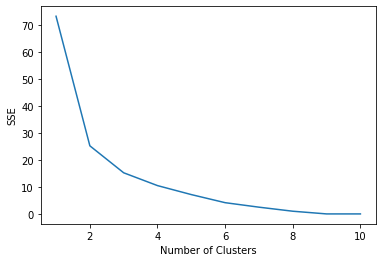

In [7]:
SSE = []

for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k, max_iter=50, random_state=1)
    k_means.fit(data)
    SSE.append(k_means.inertia_)
    
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

Ans: To find the optimal 'k' number of clusters, we observe which k reduces the  
Sum-of-squared errors (SSE) value of the dataset the most from the elbow method. 

3. On the Vertebrate dataset, we illustrate the results of using three hierarchical clustering algorithms (1) single link (MIN), (2) complete link (MAX), and (3) group average. Given the class label in the original dataset, compute the cophenetic correlation coefficient of the clustering produced by each algorithm. Which clustering algorithm shows the best match with the class labels?

In [8]:
vert = pd.read_csv("vertebrate.csv")
vert.head()

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians


In [9]:
names = vert['Name']
Y = vert['Class']
X = vert.drop(['Name', 'Class'], axis=1)

In [10]:
X

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [11]:
Y

0        mammals
1       reptiles
2         fishes
3        mammals
4     amphibians
5       reptiles
6        mammals
7          birds
8        mammals
9         fishes
10      reptiles
11         birds
12       mammals
13        fishes
14    amphibians
Name: Class, dtype: object

In [12]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy

# Converting the string classes to categorical int values
Y = pd.factorize(Y)[0].reshape(-1, 1)
Ydist = pdist(Y, metric='hamming')

In [18]:
Y

array([[0],
       [1],
       [2],
       [0],
       [3],
       [1],
       [0],
       [4],
       [0],
       [2],
       [1],
       [4],
       [0],
       [2],
       [3]])

In [19]:
Ydist

array([1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [20]:
# Algorithm: Single Link
Z = hierarchy.linkage(X.to_numpy(), 'single')
c, Zdist = hierarchy.cophenet(Z, Ydist);

print(f"The Cophenetic Correlation Coefficient of the single link algorithm is {c:.2f}")

The Cophenetic Correlation Coefficient of the single link algorithm is 0.36


In [21]:
# Algorithm: Complete Link
Z = hierarchy.linkage(X.to_numpy(), 'complete')
c, Zdist = hierarchy.cophenet(Z, Ydist);

print(f"The Cophenetic Correlation Coefficient of the complete link algorithm is {c:.2f}")

The Cophenetic Correlation Coefficient of the complete link algorithm is 0.61


In [22]:
# Algorithm: Group Average
Z = hierarchy.linkage(X.to_numpy(), 'average')
c, Zdist = hierarchy.cophenet(Z, Ydist);

print(f"The Cophenetic Correlation Coefficient of the group average algorithm is {c:.2f}")

The Cophenetic Correlation Coefficient of the group average algorithm is 0.49


Ans: Since the complete link algorithm shows the highest Cophenetic Correlation Coefficient, thus it performs the best

4. On the chameleon dataset, how many clusters are produced by DBSCAN when the minimum number of points (min samples) is set to 1, 2, 3, 4, and 5, respectively, while neighborhood radius (eps) is set to a constant value of 15.5. For each instance, copy and paste the plot of the clusters.

In [23]:
df_chameleon = pd.read_csv("chameleon.data", delimiter=' ', names=['x', 'y'])
df_chameleon.head()

,x,y
0,650.914,214.888
1,41.767,179.408
2,509.126,233.749
3,486.403,152.427
4,46.883,367.904


<AxesSubplot:xlabel='x', ylabel='y'>

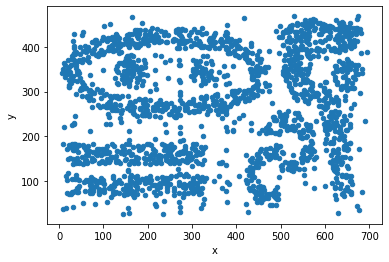

In [24]:
df_chameleon.plot.scatter(x='x', y='y')

In [25]:
# No of clusters produced by DBSCAN when min samples is set to 1, 2, 3, 4, and 5 
# neighborhood radius (eps) is a constant value of 15.5

from sklearn.cluster import DBSCAN
import numpy as np

Number of clusters produced: 79


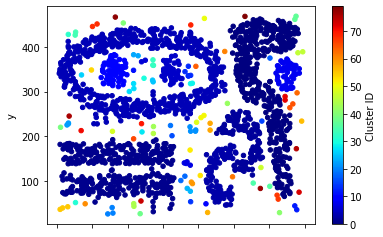

In [26]:
#min_samples=1

db = DBSCAN(eps=15.5, min_samples=1).fit(df_chameleon)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])
results = pd.concat((df_chameleon, labels), axis=1)
results.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet')
print("Number of clusters produced: {}".format(labels.max()[0]))

Number of clusters produced: 33


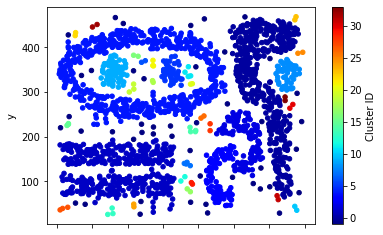

In [27]:
#min_samples=2

db = DBSCAN(eps=15.5, min_samples=2).fit(df_chameleon)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])
results = pd.concat((df_chameleon, labels), axis=1)
results.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet')
print("Number of clusters produced: {}".format(labels.max()[0]))

Number of clusters produced: 15


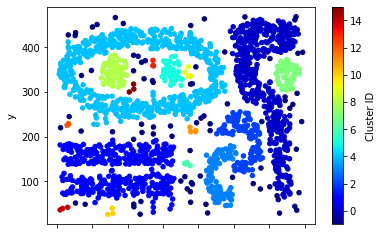

In [28]:
#min_samples=3

db = DBSCAN(eps=15.5, min_samples=3).fit(df_chameleon)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])
results = pd.concat((df_chameleon, labels), axis=1)
results.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet')
print("Number of clusters produced: {}".format(labels.max()[0]))

Number of clusters produced: 10


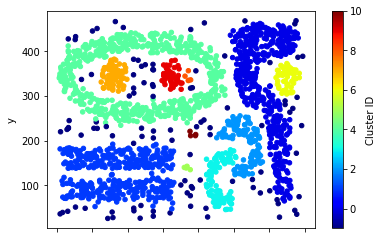

In [29]:
#min_samples=4

db = DBSCAN(eps=15.5, min_samples=4).fit(df_chameleon)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])
results = pd.concat((df_chameleon, labels), axis=1)
results.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet')
print("Number of clusters produced: {}".format(labels.max()[0]))

Number of clusters produced: 8


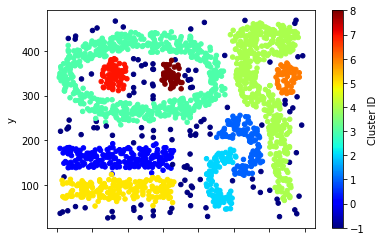

In [30]:
#min_samples=5

db = DBSCAN(eps=15.5, min_samples=5).fit(df_chameleon)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])
results = pd.concat((df_chameleon, labels), axis=1)
results.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet')
print("Number of clusters produced: {}".format(labels.max()[0]))

5. For elliptical and 2D data, we applied k-means with k = 2. What happens if we use k = 10 for both these datasets? Copy and paste the clusters formed.

In [31]:
df_elliptical = pd.read_csv("elliptical.txt", delimiter=' ', names=['x', 'y'])
df_elliptical.head()

,x,y
0,0.0043,0.1927
1,-0.1463,-0.0819
2,-0.0179,-0.0826
3,0.0891,0.2139
4,-0.0302,0.1504


In [32]:
df_2d = pd.read_csv("2d_data.txt", delimiter=' ', names=['x', 'y'])
df_2d.head()

,x,y
0,0.0433,0.6300
1,0.0467,0.7033
2,0.0500,0.6833
3,0.0500,0.6900
4,0.0500,0.6933


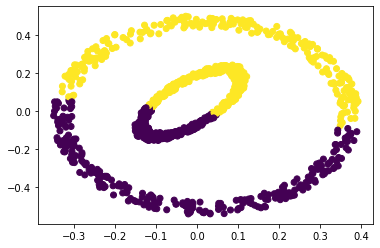

In [33]:
# For no of clusters = 2

#Elliptical
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(df_elliptical)
labels = k_means.predict(df_elliptical)
plt.scatter(df_elliptical['x'], df_elliptical['y'], c=labels)

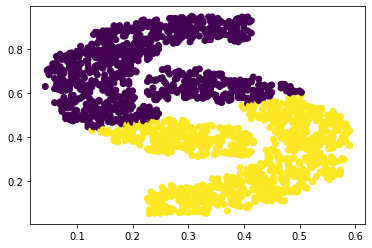

In [34]:
#2d 
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(df_2d)
labels = k_means.predict(df_2d)
plt.scatter(df_2d['x'], df_2d['y'], c=labels)

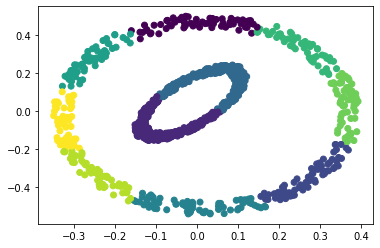

In [35]:
# For no of clusters = 10

#Elliptical
k_means = cluster.KMeans(n_clusters=10, max_iter=50, random_state=1)
k_means.fit(df_elliptical)
labels = k_means.predict(df_elliptical)
plt.scatter(df_elliptical['x'], df_elliptical['y'], c=labels)

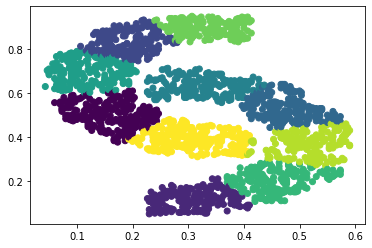

In [36]:
#2d
k_means = cluster.KMeans(n_clusters=10, max_iter=50, random_state=1)
k_means.fit(df_2d)
labels = k_means.predict(df_2d)
plt.scatter(df_2d['x'], df_2d['y'], c=labels)

### Problem 2

The files for this problem are under Experiment 2 folder. Datasets to be used for experimentation are : `samsung test labels`, `samsung train labels`, `samsung train`, `samsung test`. Jupyter notebook: `pca and clustering.ipynb`. The data comes from the accelerometers and gyros of Samsung Galaxy S3 mobile phones (https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones).



In this data, the type of activity a person was performing with a phone in their pocket is also known - whether they were walking, standing, lying down, sitting, walking up or walking down the stairs. Answer the following questions:
1. Let us look at the correspondence between the cluster labels and the original activity class labels. We see that each cluster has points coming from multiple classes, and is thus impure. Let's look at the maximum percentage of points in a cluster that are coming from a single class, which we can call as the 'purity' metric. For example, if a cluster consisting of 300 points has the following distribution of class labels:

* class 1 - 200
* class 3 - 50
* class 6 - 50

then the purity metric for this cluster will be 200/300, which is approximately 0.67. A higher value of this metric for a cluster signifies higher purity of the cluster. Compute this metric for all of the 6 clusters produced by running Kmeans with K = 6 on the given dataset. What is the maximum purity metric across all 6 clusters?

In [37]:
x_train = np.loadtxt("samsung_train.txt")
y_train_labels = np.loadtxt("samsung_train_labels.txt").astype(int)
x_test = np.loadtxt("samsung_test.txt")
y_test_labels = np.loadtxt("samsung_test_labels.txt").astype(int)

In [38]:
X = np.vstack([x_train, x_test])
y = np.hstack([y_train_labels, y_test_labels])

In [39]:
n_classes = len(np.unique(y))
print (f"Number of classes are {n_classes}:\n{np.unique(y)}")

Number of classes are 6:
[1 2 3 4 5 6]


In [40]:
# kMeans cluster for k=6
from sklearn.cluster import KMeans
kmeans6 = KMeans(n_clusters=6, n_init=100, 
                random_state=10)
kmeans6.fit(X)
cluster_labels6 = kmeans6.labels_

In [41]:
# Frequency Matrix to see how well the kMeans classifier did

tab_ref = pd.crosstab(y, cluster_labels6, margins=True, normalize=False)
tab_ref.index = ['walking', 'going up the stairs','going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab_ref.columns = ['cluster' + str(i + 1) for i in range(len(tab_ref.index)-1)] + ['all']


tab_ref

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,all
walking,0,704,0,150,868,0,1722
going up the stairs,0,1167,0,82,295,0,1544
going down the stairs,0,187,0,455,764,0,1406
sitting,49,3,1253,0,0,472,1777
standing,0,0,1232,0,0,674,1906
lying,1761,12,0,0,0,171,1944
all,1810,2073,2485,687,1927,1317,10299


In [42]:
# Drop the reference-only 'all' margins columns.
tab = tab_ref.drop(labels='all', axis=1)
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6
walking,0,704,0,150,868,0
going up the stairs,0,1167,0,82,295,0
going down the stairs,0,187,0,455,764,0
sitting,49,3,1253,0,0,472
standing,0,0,1232,0,0,674
lying,1761,12,0,0,0,171
all,1810,2073,2485,687,1927,1317


In [43]:
# Determine purity metrics for each class 
cluster_purity6 = []

for i in range(len(tab.columns)):
    numMax = max(tab.iloc[1:5,i])
    numTotal = tab.iloc[-1,i].sum() # Compare against the total of the column
    cluster_purity6.append(numMax/numTotal)
    
cluster_purity6

[0.02707182320441989,
 0.5629522431259045,
 0.504225352112676,
 0.6622998544395924,
 0.39647119875454073,
 0.5117691723614275]

In [44]:
print(f"The cluster with the maximum purity is {max(cluster_purity6):.2f} - Cluster " +
      f"({cluster_purity6.index(max(cluster_purity6))})")

The cluster with the maximum purity is 0.66 - Cluster (3)


2. What is the maximum purity metric for any cluster if we run Kmeans with K = 10 on the same dataset? Explain the rise/fall in purity as we increase K from 6 to 10.

In [45]:
kmeans10 = KMeans(n_clusters=10, n_init=100, random_state=10)
kmeans10.fit(X)
cluster_labels10 = kmeans10.labels_

In [46]:
# Frequency Matrix to see how well the kMeans classier did

tab_ref = pd.crosstab(y, cluster_labels10, margins=True, normalize=False)
tab_ref.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab_ref.columns = ['cluster' + str(i + 1) for i in range(10)] + ['all']


tab_ref

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,all
walking,0,1011,0,399,0,74,103,0,135,0,1722
going up the stairs,0,57,0,925,0,77,468,0,17,0,1544
going down the stairs,0,150,0,181,0,772,14,0,289,0,1406
sitting,16,0,1100,3,36,0,0,549,0,73,1777
standing,0,0,980,2,0,0,0,917,0,7,1906
lying,769,0,0,4,909,0,0,5,0,257,1944
all,785,1218,2080,1514,945,923,585,1471,441,337,10299


In [47]:
tab = tab_ref.drop(labels='all', axis=1)
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
walking,0,1011,0,399,0,74,103,0,135,0
going up the stairs,0,57,0,925,0,77,468,0,17,0
going down the stairs,0,150,0,181,0,772,14,0,289,0
sitting,16,0,1100,3,36,0,0,549,0,73
standing,0,0,980,2,0,0,0,917,0,7
lying,769,0,0,4,909,0,0,5,0,257
all,785,1218,2080,1514,945,923,585,1471,441,337


In [48]:
cluster_purity10 = []

for i in range(len(tab.columns)):
    numMax = max(tab.iloc[1:5,i])
    numTotal = tab.iloc[-1,i].sum() # Compare against the total of the column
    cluster_purity10.append(numMax/numTotal)
    
cluster_purity10

[0.02038216560509554,
 0.12315270935960591,
 0.5288461538461539,
 0.6109643328929987,
 0.0380952380952381,
 0.8364030335861322,
 0.8,
 0.6233854520734194,
 0.655328798185941,
 0.2166172106824926]

In [49]:
print(f"The cluster with the maximum purity is {max(cluster_purity10):.2f} - Cluster " +
      f"({cluster_purity10.index(max(cluster_purity10))})")

The cluster with the maximum purity is 0.84 - Cluster (5)


Ans: The reason why the purity increased when the no of clusters increased from 6 to 10, despite the no of classes being 6, is that there were certain points that belonged to the same class yet were distant enough to be considered different. But when the available no of clusters increased they could be clustered differently and thus more accurately

### Problem 3

The files for this problem are under Experiment 3 folder. Jupyter notebook: `covid-19research-challenge.ipynb`. In this experiment, we will be looking at the problem of clustering real-world research articles related to COVID-19. Dataset Download URL: https:// drive.google.com/file/d/1IC0s9QoBLWFN9tRI-z2QbJJWgngfAm8w/view?usp=sharing (Filename: CORD-19-research-challenge.zip, File size: 1.58 GB). Please download and unzip this file in the Experiment 3 folder before running the Python notebook for this problem. Dataset Description: In response to the COVID-19 pandemic, the White House and a coalition of leading research groups have prepared the COVID-19 Open Research Dataset (CORD-19). CORD-19 is a resource of over 29,000 scholarly articles, including over 13,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community to apply recent advances in natural language processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious disease. There is a growing urgency for these approaches because of the rapid acceleration in modern coronavirus literature, making it difficult for the medical research community to keep up. Answer the following questions.

1. After handling duplicates, what is the count, mean, standard deviation minimum, and maximum values for the abstract word count and body word count?

In [251]:
meta_df = pd.read_csv("metadata.csv", dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
orig_size = len(meta_df)
len(meta_df)

51078

In [252]:
meta_df.describe()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
count,51078,38022,51078,50920,47741,41082,37861,51078,42352,51070,48891,46368,964,1768,51078,51078,42511,50776
unique,51045,38008,6,50117,47725,41082,37834,13,41951,6463,46651,6220,765,1768,2,2,4,50773
top,79mzwv1c,4644c32551fb23aa873a7738ecc8d777bd49877e,PMC,Infectious disease surveillance update,10.1016/j.jcv.2004.10.021,PMC6194607,16194517,els-covid,Unknown,2020,"Parry, Jane",Journal of Virology,3006645647,#4170,True,False,custom_license,http://www.hcup-us.ahrq.gov/reports/statbriefs...
freq,2,4,28648,26,2,1,2,19457,337,592,32,1744,14,1,38022,31911,29177,2


In [253]:
import glob
import json

# Load only a subsection of json files
all_json = glob.glob(f'**/a*.json', recursive=True)

len(all_json)

2555

In [254]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
    
def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data

In [255]:
# Process all of the papers into a single dataframe

dict_ = {'paper_id': [], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
for idx, entry in enumerate(all_json):
    try:
        if idx % (len(all_json) // 10) == 0:
            print(f'Processing index: {idx} of {len(all_json)}')
        content = FileReader(entry)

        # get metadata information
        meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
        # no metadata, skip this paper
        if len(meta_data) == 0:
            continue

        dict_['paper_id'].append(content.paper_id)
        dict_['abstract'].append(content.abstract)
        dict_['body_text'].append(content.body_text)

        # also create a column for the summary of abstract to be used in a plot
        if len(content.abstract) == 0: 
            # no abstract provided
            dict_['abstract_summary'].append("Not provided.")
        elif len(content.abstract.split(' ')) > 100:
            # abstract provided is too long for plot, take first 300 words append with ...
            info = content.abstract.split(' ')[:100]
            summary = get_breaks(' '.join(info), 40)
            dict_['abstract_summary'].append(summary + "...")
        else:
            # abstract is short enough
            summary = get_breaks(content.abstract, 40)
            dict_['abstract_summary'].append(summary)

        # get metadata information
        meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]

        try:
            # if more than one author
            authors = meta_data['authors'].values[0].split(';')
            if len(authors) > 2:
                # more than 2 authors, may be problem when plotting, so take first 2 append with ...
                dict_['authors'].append(". ".join(authors[:2]) + "...")
            else:
                # authors will fit in plot
                dict_['authors'].append(". ".join(authors))
        except Exception as e:
            # if only one author - or Null valie
            dict_['authors'].append(meta_data['authors'].values[0])

        # add the title information, add breaks when needed
        try:
            title = get_breaks(meta_data['title'].values[0], 40)
            dict_['title'].append(title)
        # if title was not provided
        except Exception as e:
            dict_['title'].append(meta_data['title'].values[0])

        # add the journal information
        dict_['journal'].append(meta_data['journal'].values[0])
        
    
    except Exception as e:
        continue


Processing index: 0 of 2555
Processing index: 255 of 2555
Processing index: 510 of 2555
Processing index: 765 of 2555
Processing index: 1020 of 2555
Processing index: 1275 of 2555
Processing index: 1530 of 2555
Processing index: 1785 of 2555
Processing index: 2040 of 2555
Processing index: 2295 of 2555
Processing index: 2550 of 2555


In [256]:
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])
df_covid.head()

,paper_id,abstract,body_text,authors,title,journal,abstract_summary
0,ac99323189694e10b699a6c845bd15b86cc06d82,Plant pathogen detection systems have been use...,"Molecular techniques, such as PCR, are capable...","Thiessen, Lindsey D.. Neill, Tara M....",Development of a quantitative loop-mediated<b...,PeerJ,Plant pathogen detection systems have been<br...
1,a1086d8acf9fe3ae22d83443b0935ecb80f3142a,Background: Secondary inhalation of medical ae...,Aerosol therapy is a mainstay of drug administ...,"McGrath, James A.. O’Sullivan, Andrew...",Investigation of the Quantity of Exhaled<br>A...,Pharmaceutics,Background: Secondary inhalation of medical<b...
2,ac99b803a90e235412c73efa91894e9a1ed3f019,Background: An analysis of NIH funding in 1996...,The National Institutes of Health (NIH) is the...,"Gillum, Leslie A.. Gouveia, Christopher...",NIH Disease Funding Levels and Burden of<br>D...,PLoS One,Background: An analysis of NIH funding in 199...
3,a401eee90cc270520c65bc001f31a617f4edb7df,(0) Comments 2 1 RESEARCH NOTE A common featur...,The current Ebola virus (EBOV) crisis has demo...,"Ekins, Sean. Freundlich, Joel S....",A common feature pharmacophore for<br>FDA-app...,F1000Res,(0) Comments 2 1 RESEARCH NOTE A common featu...
4,a5bedf3a8d33e6b501c2203982eaaa5567011d86,Two groups with three wild boars each were use...,"Members of the Pestivirus genus, within the Fl...","Muñoz-González, Sara. Pérez-Simó, Marta...",Classical Swine Fever Virus vs. Classical<br>...,PLoS One,Two groups with three wild boars each were us...


In [257]:
# Add columns to the dataframe for 'word count' and the paper's 'body word count'

df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))

In [258]:
df_covid.head()

,paper_id,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count
0,ac99323189694e10b699a6c845bd15b86cc06d82,Plant pathogen detection systems have been use...,"Molecular techniques, such as PCR, are capable...","Thiessen, Lindsey D.. Neill, Tara M....",Development of a quantitative loop-mediated<b...,PeerJ,Plant pathogen detection systems have been<br...,233,4616
1,a1086d8acf9fe3ae22d83443b0935ecb80f3142a,Background: Secondary inhalation of medical ae...,Aerosol therapy is a mainstay of drug administ...,"McGrath, James A.. O’Sullivan, Andrew...",Investigation of the Quantity of Exhaled<br>A...,Pharmaceutics,Background: Secondary inhalation of medical<b...,246,3156
2,ac99b803a90e235412c73efa91894e9a1ed3f019,Background: An analysis of NIH funding in 1996...,The National Institutes of Health (NIH) is the...,"Gillum, Leslie A.. Gouveia, Christopher...",NIH Disease Funding Levels and Burden of<br>D...,PLoS One,Background: An analysis of NIH funding in 199...,198,3396
3,a401eee90cc270520c65bc001f31a617f4edb7df,(0) Comments 2 1 RESEARCH NOTE A common featur...,The current Ebola virus (EBOV) crisis has demo...,"Ekins, Sean. Freundlich, Joel S....",A common feature pharmacophore for<br>FDA-app...,F1000Res,(0) Comments 2 1 RESEARCH NOTE A common featu...,262,4114
4,a5bedf3a8d33e6b501c2203982eaaa5567011d86,Two groups with three wild boars each were use...,"Members of the Pestivirus genus, within the Fl...","Muñoz-González, Sara. Pérez-Simó, Marta...",Classical Swine Fever Virus vs. Classical<br>...,PLoS One,Two groups with three wild boars each were us...,312,5440


In [259]:
df_covid.describe(include='all')

,paper_id,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count
count,2306,2306,2306,2269,2305,2194,2306,2306.000000,2306.000000
unique,2306,1678,2306,2255,2303,1025,1678,NaN,NaN
top,a3fa8b724a988e6cf50d25645fe687fe50ba3819,,"VIROLOGY 77, 637-649 (19'i'i') This species is...","Mizutani, Tetsuya. Fukushi, Shuetsu...",ISAR News,PLoS One,Not provided.,NaN,NaN
freq,1,628,1,3,2,101,628,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.393322,4590.798786
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.932096,6084.512804
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2403.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.000000,3552.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.000000,5329.500000


In [260]:
# Remove duplicates and entries with missing abstracts and body_text

df_covid = df_covid.dropna()
df_covid = df_covid[df_covid.abstract != ''] #Remove rows which are missing abstracts
df_covid = df_covid[df_covid.body_text != ''] #Remove rows which are missing body_text
df_covid = df_covid.drop_duplicates(['abstract', 'body_text']) # remove duplicate rows having same abstract and body_text
df_covid.describe(include='all')

,paper_id,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count
count,1573,1573,1573,1573,1573,1573,1573,1573.000000,1573.000000
unique,1573,1573,1573,1566,1573,747,1573,NaN,NaN
top,ae0294a3bf36a8f845194ac63d10b1b9d264d5a0,The recent influenza pandemic proved that an i...,a1111111111 a1111111111 a1111111111 a111111111...,"Mizutani, Tetsuya. Fukushi, Shuetsu...",Newly identified respiratory viruses<br>assoc...,PLoS One,"publicly funded repositories, such as the WHO...",NaN,NaN
freq,1,1,1,2,1,101,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.319771,4484.453910
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.942464,3017.265516
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,358.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.000000,2800.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201.000000,3826.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.000000,5458.000000


In [261]:
df_diff = df_covid.drop(df_covid.columns.difference(['abstract_word_count','body_word_count']), 1)

In [262]:
print("The total count for abstract word count is", df_diff.count()[0])

The total count for abstract word count is 1573


In [263]:
print("The total count for body word count is", df_diff.count()[1])

The total count for body word count is 1573


In [264]:
print("The mean for abstract word count is", str(round(df_diff.mean()[0],2)))

The mean for abstract word count is 219.32


In [265]:
print("The mean for body word count is", str(round(df_diff.mean()[1],2)))

The mean for body word count is 4484.45


In [266]:
print("The std for abstract word count is", str(round(df_diff.std()[0],2)))

The std for abstract word count is 128.94


In [267]:
print("The std for body word count is", str(round(df_diff.std()[1],2)))

The std for body word count is 3017.27


In [268]:
print("The min for abstract word count is", df_diff.min()[0])

The min for abstract word count is 1


In [269]:
print("The min for body word count is", df_diff.min()[1])

The min for body word count is 358


In [270]:
print("The max for abstract word count is", df_diff.max()[0])

The max for abstract word count is 1451


In [271]:
print("The max for body word count is", df_diff.max()[1])

The max for body word count is 42444


2. Given the following word list: ['the', '2019', 'novel', 'coronavirus', 'sarscov2', 'identified', 'as', 'the', 'cause'], what is its corresponding list of 2-grams ?

In [272]:
words = ["the", '2019', 'novel', 'coronavirus', 'sarscov2', 'identified', 'as', 'the', 'cause']

In [273]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/amartyadutta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [274]:
bigrams = list(nltk.bigrams(words))
bigrams

[('the', '2019'),
 ('2019', 'novel'),
 ('novel', 'coronavirus'),
 ('coronavirus', 'sarscov2'),
 ('sarscov2', 'identified'),
 ('identified', 'as'),
 ('as', 'the'),
 ('the', 'cause')]

3. When we applied k-means clustering with K = 10 on the data created using HashingVectorizer features from 2-grams, we could see that some clusters still had some overlap in the t-SNE plot. Can you improve this by changing the number of clusters? What value of K visually leads to good separation among the clusters in the t-SNE plot? Copy and paste the corresponding t-SNE plot.

In [275]:
# To make computations faster
df_covid = df_covid.head(12500)

In [276]:
# Preprocessing
import re

df_covid['body_text'] = df_covid['body_text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))


# Convert all text to lowercase.
df_covid['body_text'] = df_covid['body_text'].str.lower()
df_covid['abstract'] = df_covid['abstract'].str.lower()

In [277]:
text = df_covid.drop(["paper_id", "abstract", "abstract_word_count", "body_word_count", "authors", "title", "journal", "abstract_summary"], axis=1)
text_arr = text.stack().tolist()

words = text['body_text'].str.split(" ")

In [278]:
n_gram_all = []

for word in words:
    # get n-grams for the instance
    n_gram = []
    for i in range(len(word)-2+1):
        n_gram.append(" ".join(word[i:i+2]))
    n_gram_all.append(n_gram)

In [279]:
from sklearn.feature_extraction.text import HashingVectorizer

hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**12)

X = hvec.fit_transform(n_gram_all)

In [280]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=5)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1573 samples in 0.010s...
[t-SNE] Computed neighbors for 1573 samples in 0.122s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1573
[t-SNE] Computed conditional probabilities for sample 1573 / 1573
[t-SNE] Mean sigma: 0.159776
[t-SNE] KL divergence after 250 iterations with early exaggeration: 156.436081
[t-SNE] KL divergence after 1000 iterations: 3.325489


In [281]:
from sklearn.cluster import MiniBatchKMeans

k = 10
kMeans = MiniBatchKMeans(n_clusters=k, random_state=34)
y_pred = kMeans.fit_predict(X)

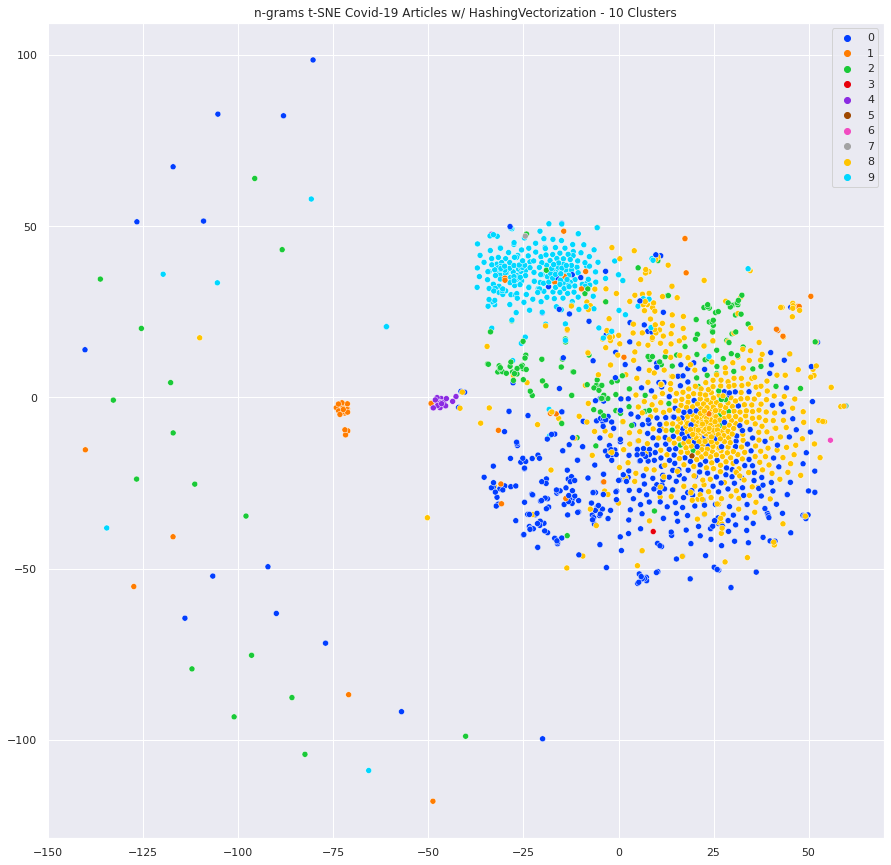

In [282]:
# Plot the standard k=10 kMeans plot

import seaborn as sns

sns.set(rc={'figure.figsize':(15,15)})

palette = sns.color_palette("bright", len(set(y_pred)))

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title(f"n-grams t-SNE Covid-19 Articles w/ HashingVectorization - {k} Clusters")
plt.show()

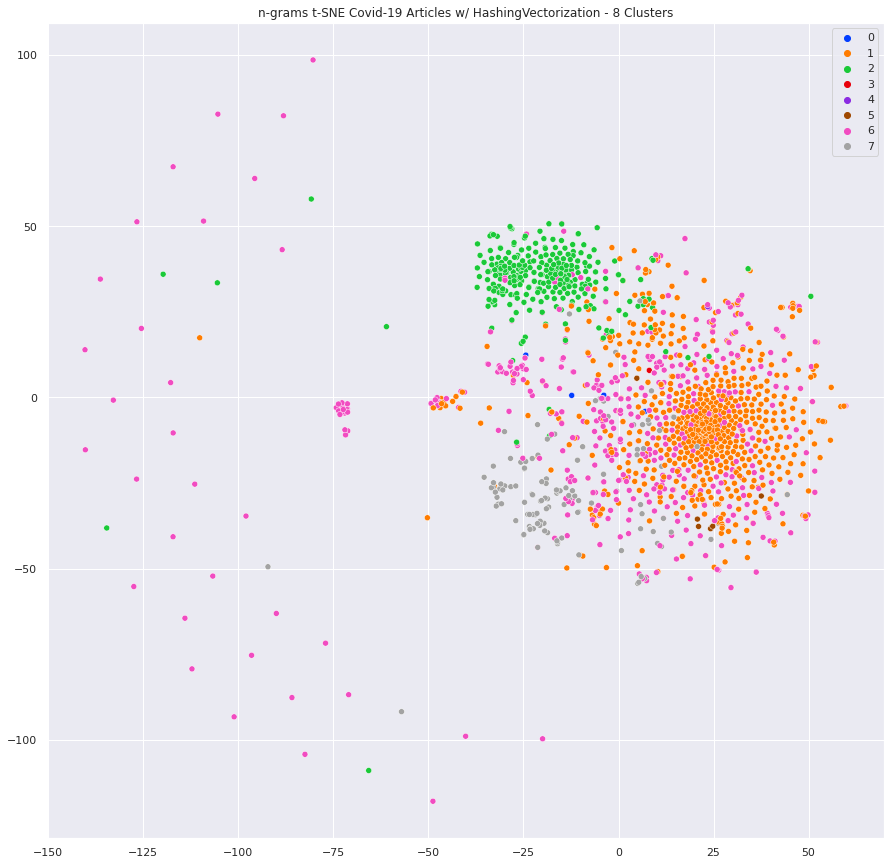

In [283]:
k = 8
kMeans = MiniBatchKMeans(n_clusters=k, random_state=34)
y_pred = kMeans.fit_predict(X)

sns.set(rc={'figure.figsize':(15,15)})

palette = sns.color_palette("bright", len(set(y_pred)))

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title(f"n-grams t-SNE Covid-19 Articles w/ HashingVectorization - {k} Clusters")
plt.show()

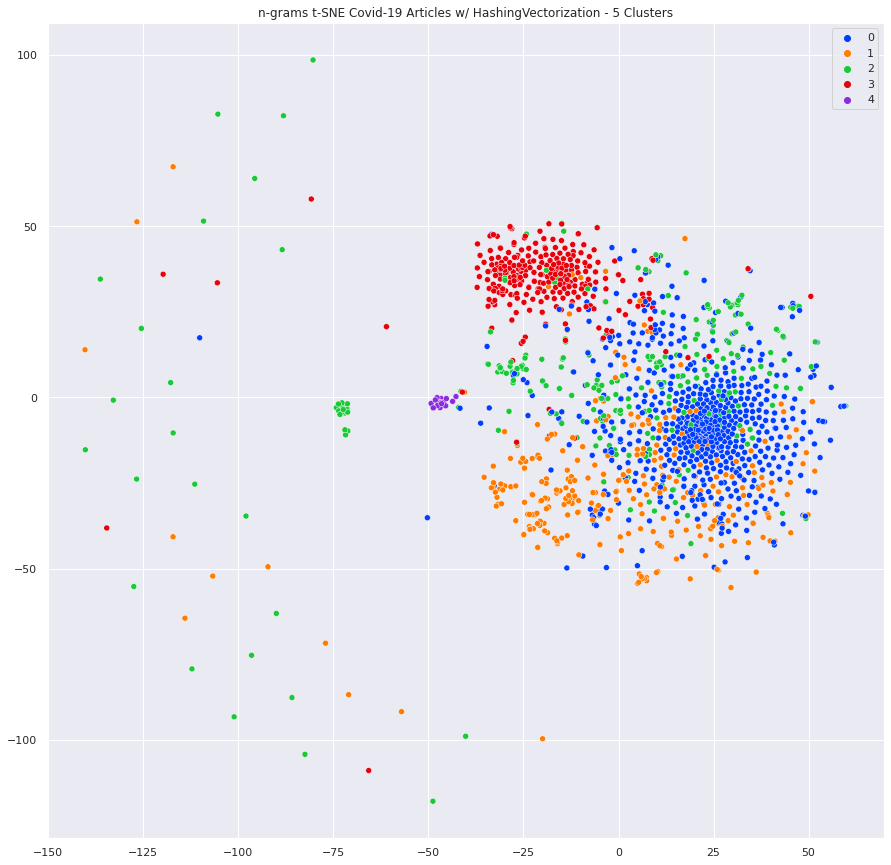

In [284]:
k = 5
kMeans = MiniBatchKMeans(n_clusters=k, random_state=34)
y_pred = kMeans.fit_predict(X)

sns.set(rc={'figure.figsize':(15,15)})

palette = sns.color_palette("bright", len(set(y_pred)))

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title(f"n-grams t-SNE Covid-19 Articles w/ HashingVectorization - {k} Clusters")
plt.show()

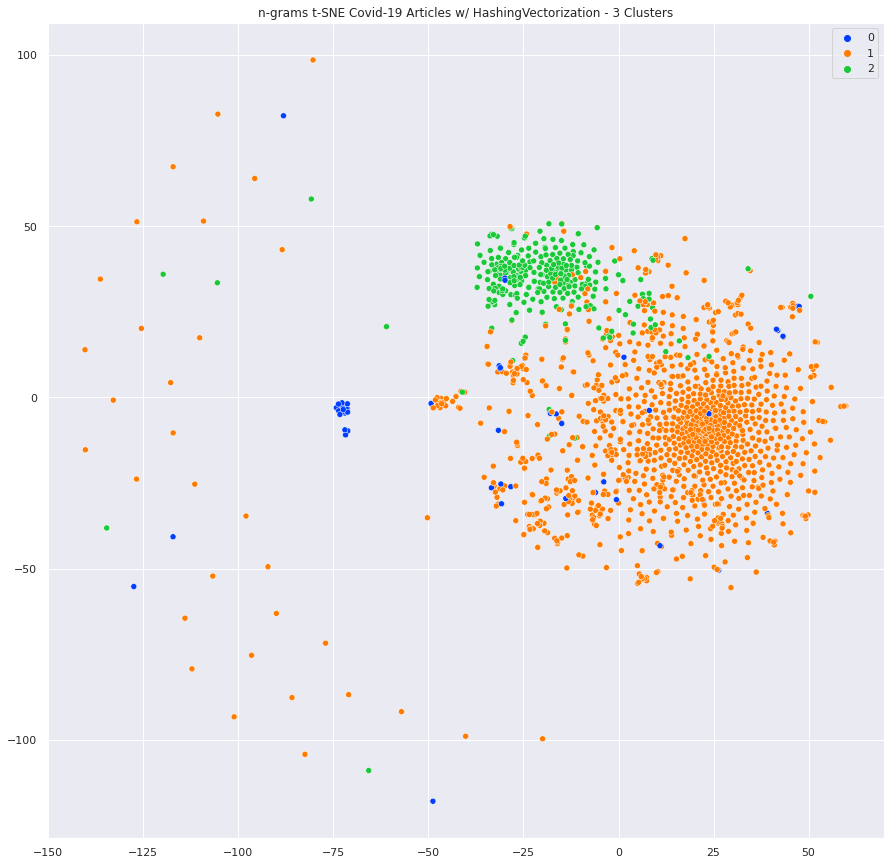

In [286]:
k = 3
kMeans = MiniBatchKMeans(n_clusters=k, random_state=34)
y_pred = kMeans.fit_predict(X)

sns.set(rc={'figure.figsize':(15,15)})

palette = sns.color_palette("bright", len(set(y_pred)))

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title(f"n-grams t-SNE Covid-19 Articles w/ HashingVectorization - {k} Clusters")
plt.show()

From the above plots, we can see that as the no of clusters decreased, the overlapping decreased as well

4. By using tf-idf vectorizer and plain text features instead of 2-grams, we could see that the clusters obtained from K-means clustering (with K = 10) are more separable in the t-SNE plot. What happens when we apply the tf-idf vectorizer on the 2-gram representation of documents instead of plain text, and then apply K-means clustering with K = 10? Copy and paste the corresponding t-SNE plot.

In [287]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2**12)
X = vectorizer.fit_transform(df_covid['body_text'].values)

In [288]:
tsne = TSNE(verbose=1)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1573 samples in 0.009s...
[t-SNE] Computed neighbors for 1573 samples in 0.127s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1573
[t-SNE] Computed conditional probabilities for sample 1573 / 1573
[t-SNE] Mean sigma: 0.226259
[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.811928
[t-SNE] KL divergence after 1000 iterations: 1.778483


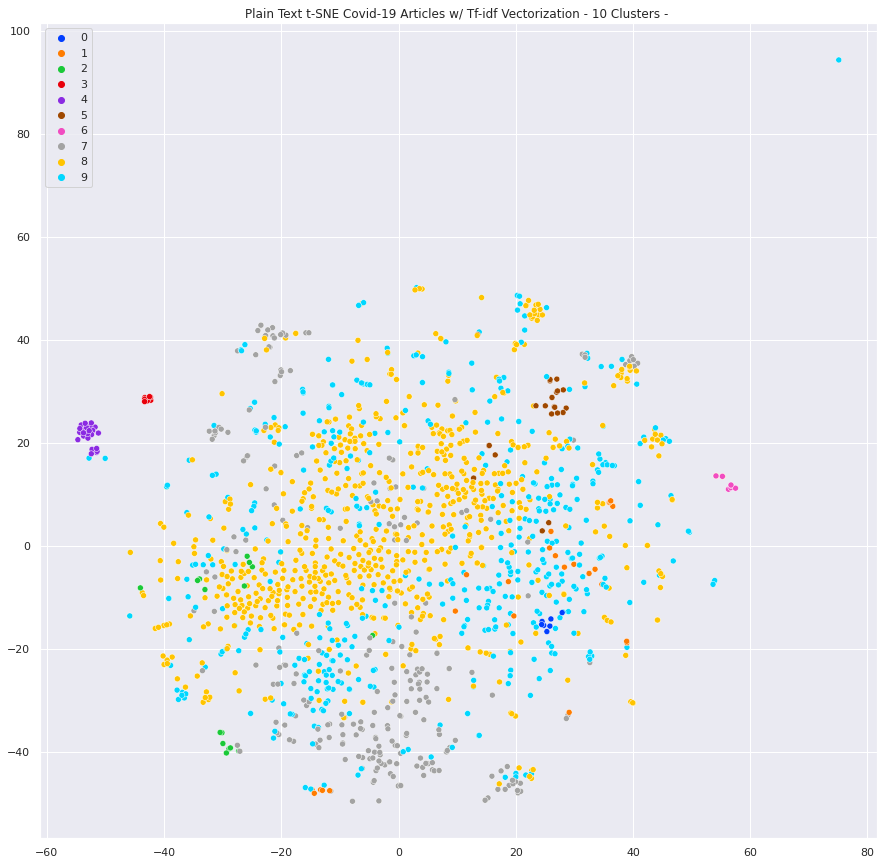

In [289]:
k = 10
kmeans = MiniBatchKMeans(n_clusters=k, random_state=20)
y_pred = kmeans.fit_predict(X)
sns.set(rc={'figure.figsize':(15,15)})

palette = sns.color_palette("bright", len(set(y_pred)))

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title(f"Plain Text t-SNE Covid-19 Articles w/ Tf-idf Vectorization - {k} Clusters - ")
plt.show()

5. In the interactive t-SNE with 20 clusters, can you do a manual analysis of different clusters to see what articles are clustered together? Choose any 5 clusters and write 4-5 keywords that describe it. Hover your mouse over the cluster point and you can see the article that it refers. You can use the box zoom feature to choose to display points of only one cluster in the plot, to simplify your analysis. Also, name the clusters that include articles involving social and economic impacts of the coronavirus?

In [290]:
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, CustomJS, Column
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap
from bokeh.io import output_file, show
from bokeh.transform import transform
from bokeh.io import output_notebook
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import RadioButtonGroup
from bokeh.models import TextInput
from bokeh.layouts import gridplot
from bokeh.models import Div
from bokeh.models import Paragraph
from bokeh.layouts import column, widgetbox

output_notebook()
y_labels = y_pred

Loading BokehJS ...

In [291]:
# data sources
source = ColumnDataSource(data=dict(
    x= X_embedded[:,0], 
    y= X_embedded[:,1],
    x_backup = X_embedded[:,0],
    y_backup = X_embedded[:,1],
    desc= y_labels, 
    titles= df_covid['title'],
    authors = df_covid['authors'],
    journal = df_covid['journal'],
    abstract = df_covid['abstract_summary'],
    labels = ["C-" + str(x) for x in y_labels]
    ))

In [292]:
# hover over information
hover = HoverTool(tooltips=[
    ("Title", "@titles{safe}"),
    ("Author(s)", "@authors"),
    ("Journal", "@journal"),
    ("Abstract", "@abstract{safe}"),
],
                 point_policy="follow_mouse")

# map colors
mapper = linear_cmap(field_name='desc', 
                     palette=Category20[20],
                     low=min(y_labels) ,high=max(y_labels))

# prepare the figure
p = figure(plot_width=800, plot_height=800, 
           tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset'], 
           title="t-SNE Covid-19 Articles", 
           toolbar_location="left")

# plot

p.scatter('x', 'y', size=5, source=source,fill_color=mapper,line_alpha=0.3,line_color="blue",legend_label = "clusters")


GlyphRenderer(id='2808', ...)

In [293]:
# add callback to control 
callback = CustomJS(args=dict(p=p, source=source))

# callback for searchbar
keyword_callback = CustomJS(args=dict(p=p, source=source))

In [294]:
# option
option = RadioButtonGroup(labels=["1", "2", "3",
                                  "4", "5", "6",
                                  "7", "8",
                                  "9", "10", "11",
                                  "12", "13", "14",
                                  "15", "16", "17",
                                  "18", "19", "20","All"], 
                          active=20)
option.js_on_click(callback)

# search box
keyword = TextInput(title="Search:",)
keyword.js_on_change('value', keyword_callback)

#header
header = Div(text="""<h1>COVID-19 Literature Cluster</h1>""")

In [295]:
# show
show(column(header, Column(option, keyword),p))

In [296]:
!jupyter nbconvert  AmartyaDutta_proj2.ipynb --to html

[NbConvertApp] Converting notebook AmartyaDutta_proj2.ipynb to html
[NbConvertApp] Writing 3967745 bytes to AmartyaDutta_proj2.html
